<a href="https://colab.research.google.com/github/riveramatthew/Micro-Credential/blob/main/Unit4_MiniProject_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
patient_data_df = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/diabetic_data.csv')
patient_data_df

encounter_id  patient_nbr  ... diabetesMed readmitted
0            2278392      8222157  ...          No         NO
1             149190     55629189  ...         Yes        >30
2              64410     86047875  ...         Yes         NO
3             500364     82442376  ...         Yes         NO
4              16680     42519267  ...         Yes         NO
...              ...          ...  ...         ...        ...
101761     443847548    100162476  ...         Yes        >30
101762     443847782     74694222  ...         Yes         NO
101763     443854148     41088789  ...         Yes         NO
101764     443857166     31693671  ...         Yes         NO
101765     443867222    175429310  ...          No         NO

[101766 rows x 50 columns]

In [70]:
patient_data_df.shape

(101766, 50)

In [71]:
patient_data_df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [72]:
patient_data_df[patient_data_df['race']=='AfricanAmerican'].shape[0] * 100 / patient_data_df.shape[0]

18.876638562977814

In [73]:
patient_data_df[patient_data_df['race']=='Asian'].shape[0] * 100 / patient_data_df.shape[0]

0.6298763830748974

In [74]:
patient_data_df[patient_data_df['race']=='Caucasian'].shape[0] * 100 / patient_data_df.shape[0]

74.77841322249081

In [75]:
patient_data_df[patient_data_df['race']=='Other'].shape[0] * 100 / patient_data_df.shape[0]

1.4798655739637994

In [76]:
import numpy as np

In [77]:
patient_data_df_01 = patient_data_df.copy()
patient_data_df_clean = patient_data_df_01.replace('?',np.NaN)
patient_data_missing_values = patient_data_df_clean.isnull().sum()
patient_data_missing_values

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [78]:
type(patient_data_df_clean)

pandas.core.frame.DataFrame

In [79]:
patient_data_df_clean.head()

encounter_id  patient_nbr             race  ... change diabetesMed readmitted
0       2278392      8222157        Caucasian  ...     No          No         NO
1        149190     55629189        Caucasian  ...     Ch         Yes        >30
2         64410     86047875  AfricanAmerican  ...     No         Yes         NO
3        500364     82442376        Caucasian  ...     Ch         Yes         NO
4         16680     42519267        Caucasian  ...     Ch         Yes         NO

[5 rows x 50 columns]

In [14]:
patient_data_df_clean[patient_data_df_clean['weight'].isnull()].shape[0] * 100 / patient_data_df_clean.shape[0]

96.85847925633315

In [15]:
patient_data_df_clean[patient_data_df_clean['medical_specialty'].isnull()].shape[0] * 100 / patient_data_df_clean.shape[0]

49.08220820313268

In [16]:
patient_data_df_clean[patient_data_df_clean['race'].isnull()].shape[0] * 100 / patient_data_df_clean.shape[0]

2.2335554114340743

In [17]:
patient_data_df_clean[patient_data_df_clean['payer_code'].isnull()].shape[0] * 100 / patient_data_df_clean.shape[0]

39.5574160328597

In [18]:
patient_data_df_clean[patient_data_df_clean['diag_1'].isnull()].shape[0] * 100 / patient_data_df_clean.shape[0]

0.020635575732562937

In [19]:
patient_data_df_clean[patient_data_df_clean['diag_2'].isnull()].shape[0] * 100 / patient_data_df_clean.shape[0]

0.3517874339170253

In [20]:
patient_data_df_clean[patient_data_df_clean['diag_3'].isnull()].shape[0] * 100 / patient_data_df_clean.shape[0]

1.398305917497003

In [21]:
patient_df_ml_prep_01= patient_data_df_clean.drop(['weight','payer_code','medical_specialty'],axis=1)
patient_df_ml_prep_01.head()

encounter_id  patient_nbr             race  ... change diabetesMed  readmitted
0       2278392      8222157        Caucasian  ...     No          No          NO
1        149190     55629189        Caucasian  ...     Ch         Yes         >30
2         64410     86047875  AfricanAmerican  ...     No         Yes          NO
3        500364     82442376        Caucasian  ...     Ch         Yes          NO
4         16680     42519267        Caucasian  ...     Ch         Yes          NO

[5 rows x 47 columns]

In [22]:
patient_df_ml_prep_01['30DayReadmit'] = np.where(patient_df_ml_prep_01['readmitted'] == 'NO', 0, 1)
patient_df_ml_prep_01.head()

encounter_id  patient_nbr  ... readmitted 30DayReadmit
0       2278392      8222157  ...         NO            0
1        149190     55629189  ...        >30            1
2         64410     86047875  ...         NO            0
3        500364     82442376  ...         NO            0
4         16680     42519267  ...         NO            0

[5 rows x 48 columns]

In [23]:
patient_df_ml_prep_01 = patient_df_ml_prep_01[((patient_df_ml_prep_01.discharge_disposition_id != 11) & 
                                          (patient_df_ml_prep_01.discharge_disposition_id != 13) &
                                          (patient_df_ml_prep_01.discharge_disposition_id != 14) & 
                                          (patient_df_ml_prep_01.discharge_disposition_id != 19) & 
                                          (patient_df_ml_prep_01.discharge_disposition_id != 20) & 
                                          (patient_df_ml_prep_01.discharge_disposition_id != 21))]

In [24]:
patient_df_ml_prep_01.shape

(99343, 48)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
# Cleaning the data, replacing the null values in numeric data by 0 and object data by unknown,
numcolumn = patient_df_ml_prep_01.select_dtypes(include = [np.number]).columns
objcolumn = patient_df_ml_prep_01.select_dtypes(include = ['object']).columns


# Substituting 0 and unknown,

patient_df_ml_prep_01[numcolumn] = patient_df_ml_prep_01[numcolumn].fillna(0)
patient_df_ml_prep_01[objcolumn] = patient_df_ml_prep_01[objcolumn].fillna("unknown")

In [27]:
patient_df_ml_prep_01.head()

encounter_id  patient_nbr  ... readmitted 30DayReadmit
0       2278392      8222157  ...         NO            0
1        149190     55629189  ...        >30            1
2         64410     86047875  ...         NO            0
3        500364     82442376  ...         NO            0
4         16680     42519267  ...         NO            0

[5 rows x 48 columns]

In [28]:
def map_now():
    listname = [('infections', 139),
                ('neoplasms', (239 - 139)),
                ('endocrine', (279 - 239)),
                ('blood', (289 - 279)),
                ('mental', (319 - 289)),
                ('nervous', (359 - 319)),
                ('sense', (389 - 359)),
                ('circulatory', (459-389)),
                ('respiratory', (519-459)),
                ('digestive', (579 - 519)),
                ('genitourinary', (629 - 579)),
                ('pregnancy', (679 - 629)),
                ('skin', (709 - 679)),
                ('musculoskeletal', (739 - 709)),
                ('congenital', (759 - 739)),
                ('perinatal', (779 - 759)),
                ('ill-defined', (799 - 779)),
                ('injury', (999 - 799))]
    
    
    dictcout = {}
    count = 1
    for name, num in listname:
        for i in range(num):
            dictcout.update({str(count): name})  
            count += 1
    return dictcout
  

def codemap(df, codes):
    import pandas as pd
    namecol = df.columns.tolist()
    for col in namecol:
        temp = [] 
        for num in df[col]:           
            if ((num is None) | (num in ['unknown', '?']) | (pd.isnull(num))): temp.append('unknown')
            elif(num.upper()[0] == 'V'): temp.append('supplemental')
            elif(num.upper()[0] == 'E'): temp.append('injury')
            else: 
                lkup = num.split('.')[0]
                temp.append(codes[lkup])           
        df.loc[:, col] = temp               
    return df 


listcol = ['diag_1', 'diag_2', 'diag_3']
codes = map_now()
patient_df_ml_prep_01[listcol] = codemap(patient_df_ml_prep_01[listcol], codes)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [29]:
patient_df_ml_prep_01.describe

<bound method NDFrame.describe of         encounter_id  patient_nbr  ... readmitted 30DayReadmit
0            2278392      8222157  ...         NO            0
1             149190     55629189  ...        >30            1
2              64410     86047875  ...         NO            0
3             500364     82442376  ...         NO            0
4              16680     42519267  ...         NO            0
...              ...          ...  ...        ...          ...
101761     443847548    100162476  ...        >30            1
101762     443847782     74694222  ...         NO            0
101763     443854148     41088789  ...         NO            0
101764     443857166     31693671  ...         NO            0
101765     443867222    175429310  ...         NO            0

[99343 rows x 48 columns]>

In [30]:
patient_df_ml_prep_02 = patient_df_ml_prep_01.drop(['encounter_id', "patient_nbr", 'admission_type_id','readmitted'], axis =1)
patient_df_ml_prep_02

race  gender      age  ...  change  diabetesMed  30DayReadmit
0             Caucasian  Female   [0-10)  ...      No           No             0
1             Caucasian  Female  [10-20)  ...      Ch          Yes             1
2       AfricanAmerican  Female  [20-30)  ...      No          Yes             0
3             Caucasian    Male  [30-40)  ...      Ch          Yes             0
4             Caucasian    Male  [40-50)  ...      Ch          Yes             0
...                 ...     ...      ...  ...     ...          ...           ...
101761  AfricanAmerican    Male  [70-80)  ...      Ch          Yes             1
101762  AfricanAmerican  Female  [80-90)  ...      No          Yes             0
101763        Caucasian    Male  [70-80)  ...      Ch          Yes             0
101764        Caucasian  Female  [80-90)  ...      Ch          Yes             0
101765        Caucasian    Male  [70-80)  ...      No           No             0

[99343 rows x 44 columns]

In [31]:
#Normalization of the data,

listnormal = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                     'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

normal = StandardScaler()

patient_df_ml_prep_02[listnormal] = normal.fit_transform(patient_df_ml_prep_02[listnormal])

patient_df_ml_prep_02.describe()

discharge_disposition_id  ...  30DayReadmit
count              99343.000000  ...  99343.000000
mean                   3.517882  ...      0.471256
std                    5.184359  ...      0.499176
min                    1.000000  ...      0.000000
25%                    1.000000  ...      0.000000
50%                    1.000000  ...      0.000000
75%                    3.000000  ...      1.000000
max                   28.000000  ...      1.000000

[8 rows x 11 columns]

In [32]:
Y = patient_df_ml_prep_02['30DayReadmit']
X = patient_df_ml_prep_02.drop(['30DayReadmit'], axis =1)
X = pd.get_dummies(X)

In [33]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = .2, 
                                                random_state = 7, stratify = Y)

In [34]:
print("shape of Xtrain,Xtest:",Xtrain.shape,Xtest.shape)

shape of Xtrain,Xtest: (79474, 169) (19869, 169)


In [35]:
# create model logistic as logistic regression using Sklearn 
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression(tol=1e-7, penalty='l2', C=0.0005)
logisticreg.fit(Xtrain, Ytrain)
Ylog = logisticreg.predict(Xtest)

In [36]:
# Checking the accuracy of the model 
print(" The accuracy of the Logistic regression model:" ,logisticreg.score(Xtest, Ytest))

 The accuracy of the Logistic regression model: 0.6276611807338064


In [37]:
# checking the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest, Ylog))

[[8379 2127]
 [5271 4092]]


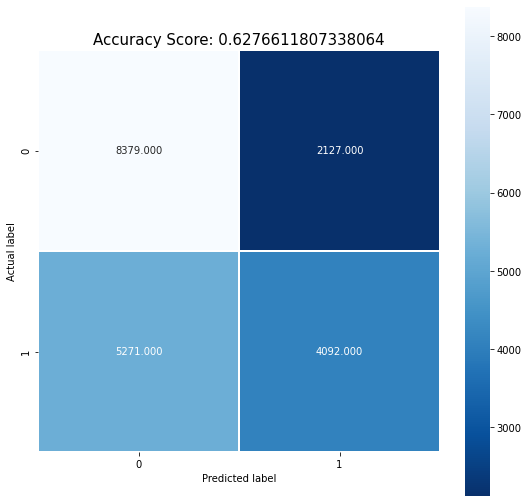

In [38]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, Ylog), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logisticreg.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [39]:
# Checking the summary of classification
from sklearn.metrics import classification_report
print(classification_report(Ytest, Ylog, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.61      0.80      0.69     10506
         YES       0.66      0.44      0.53      9363

    accuracy                           0.63     19869
   macro avg       0.64      0.62      0.61     19869
weighted avg       0.63      0.63      0.61     19869



In [40]:
# Checking the performance of model using ROC curve plots
YScre = logisticreg.decision_function(Xtest)

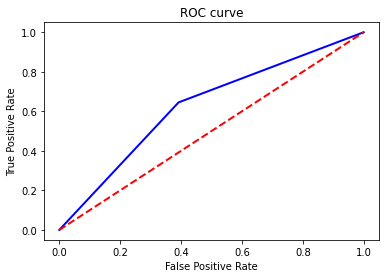

In [41]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve

fpr, tpr,_=roc_curve(logisticreg.predict(Xtrain),Ytrain,drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Creating the ROC,
plt.plot(fpr, tpr, color='blue',
 lw=2, label='ROC curve')
##Finding FPR and TPR,
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
##Splecifying the label and title,
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [42]:
from sklearn import metrics

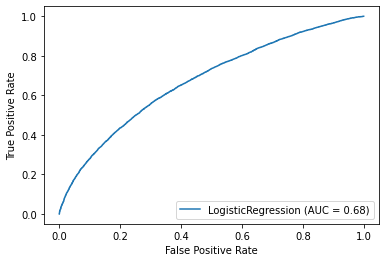

In [43]:
metrics.plot_roc_curve(logisticreg, Xtest, Ytest)  

In [45]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42,n_estimators=500)
random_forest.fit(Xtrain, Ytrain)
Yrandforest = random_forest.predict(Xtest)

In [46]:
#Calculating the score,
scorey =random_forest.predict_proba(Xtest)[:,1]
rfpr, rtpr, thresholds = roc_curve(Ytest, scorey)

In [47]:
#Checking the accuracy,
print(" Accuracy of Randomeforest classification: ", random_forest.score(Xtest, Ytest))

 Accuracy of Randomeforest classification:  0.6374251346318386


In [48]:
#Printing the confusion matrix,
print(confusion_matrix(Ytest, Yrandforest))

[[7558 2948]
 [4256 5107]]


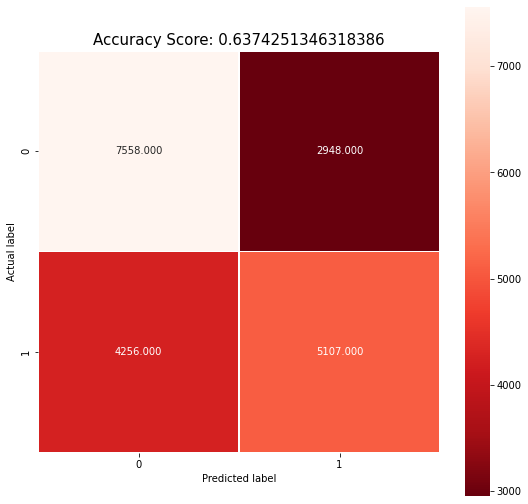

In [49]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, Yrandforest), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(random_forest.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [50]:
print(classification_report(Ytest, Yrandforest, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.64      0.72      0.68     10506
         YES       0.63      0.55      0.59      9363

    accuracy                           0.64     19869
   macro avg       0.64      0.63      0.63     19869
weighted avg       0.64      0.64      0.63     19869



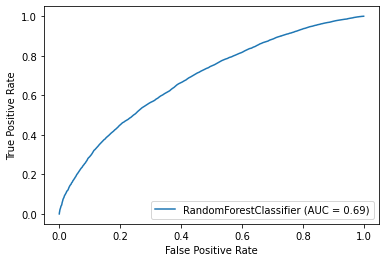

In [51]:
metrics.plot_roc_curve(random_forest, Xtest, Ytest)

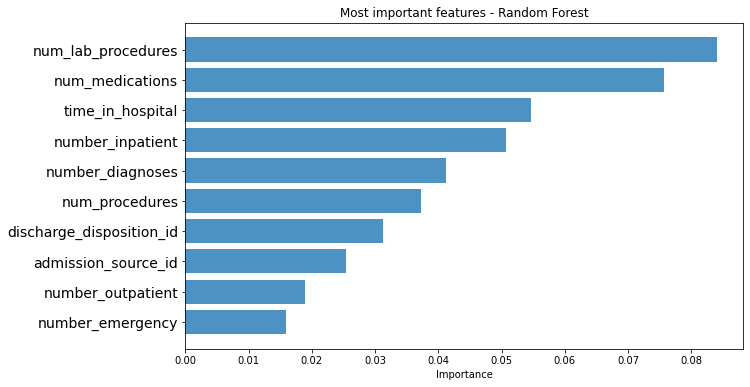

In [52]:
#Determining which features are most important,
feature_names = Xtrain.columns
feature_imports = random_forest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()

In [53]:
import numpy as np
import pandas as pd
# from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [54]:
clfgini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clfgini.fit(Xtrain, Ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [55]:
ypreddt = clfgini.predict(Xtest)
ypreddt

array([1, 1, 0, ..., 1, 0, 1])

In [56]:
print( "Accuracy is ", accuracy_score(Ytest,ypreddt)*100)

Accuracy is  62.358447833308176


In [57]:
import graphviz
from IPython.display import Image
import pydotplus

In [58]:
dot_dt_q2 = tree.export_graphviz(clfgini, out_file="dt_q2.dot", feature_names=Xtrain.columns, max_depth=3, class_names=["1","0"], filled=True, rounded=True, special_characters=True)
graph_dt_q2 = pydotplus.graph_from_dot_file('dt_q2.dot')

In [59]:
# import os
# os.environ["PATH"] += os.pathsep + 'C:\\NITEEN\\Data Science\\library\\graphviz-2.38\\release\\bin'

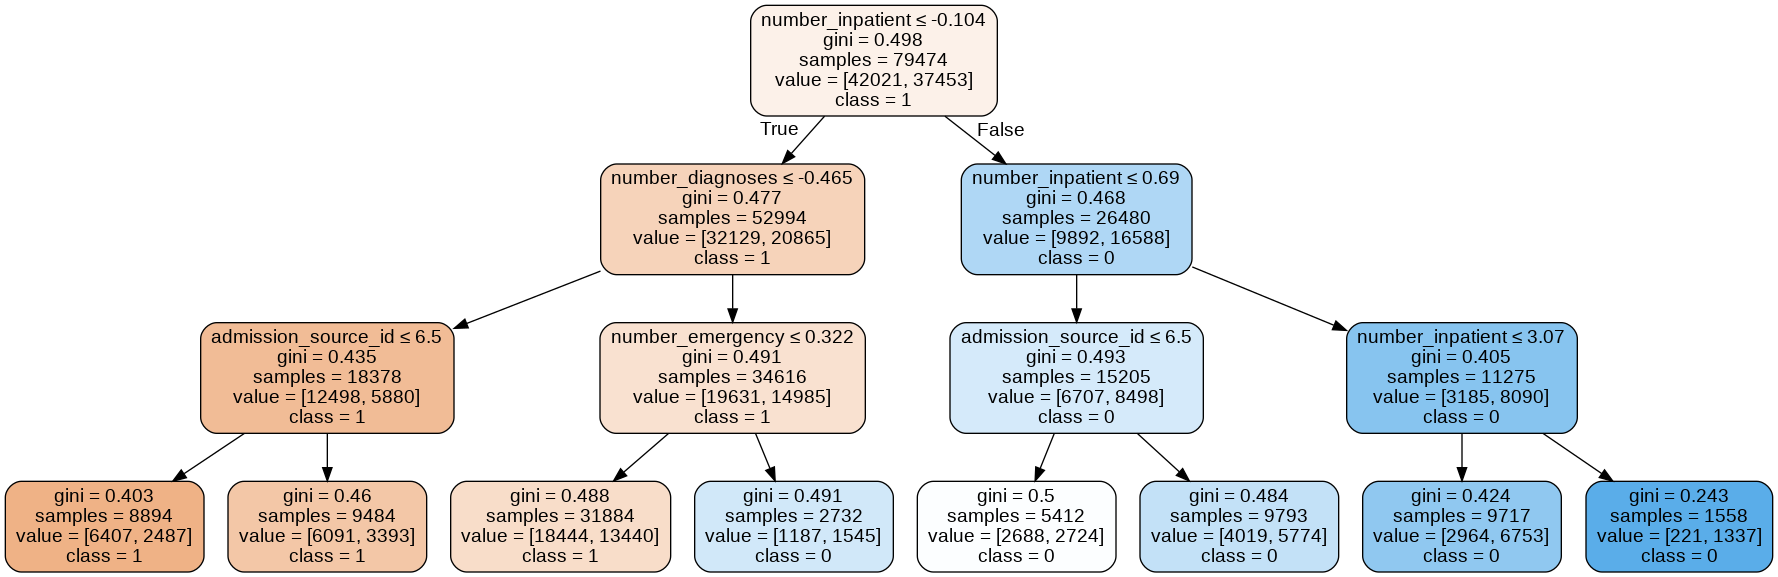

In [60]:
Image(graph_dt_q2.create_png())

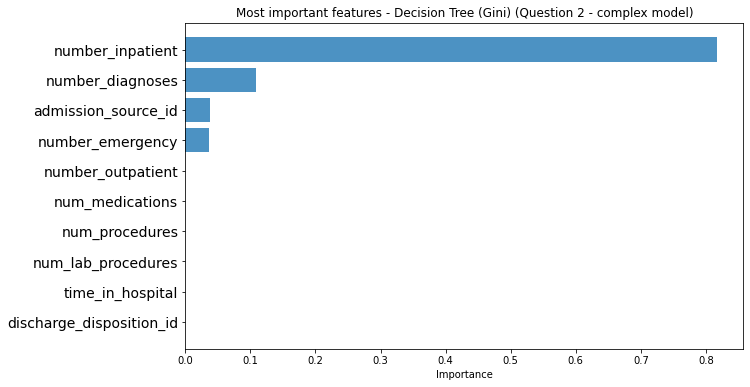

In [61]:
# Shot top most features based on importance
feature_names = Xtrain.columns
feature_imports = clfgini.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree (Gini) (Question 2 - complex model)')
plt.show()

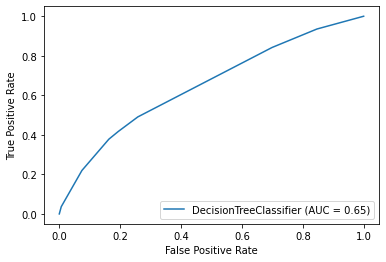

In [62]:
metrics.plot_roc_curve(clfgini, Xtest, Ytest)

In [65]:
fpr_log, tpr_log, thresholds = roc_curve(Ytest, YScre)#logistic regression
fpr_rf, tpr_rf, thresholds = roc_curve(Ytest, Yrandforest)#random forest classifier

In [66]:
fpr_dt, tpr_dt, thresholds = roc_curve(Ytest,ypreddt )  # decision tree

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


Text(0, 0.5, 'True Positive Rate')

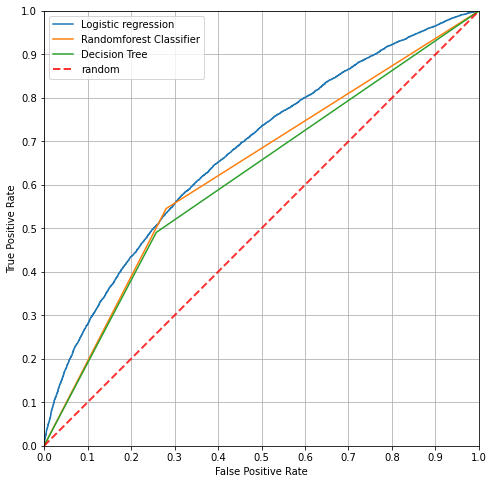

In [67]:
# compare the ROC curve between different models
plt.figure(figsize=(8,8))
plt.plot(fpr_log, tpr_log, label='Logistic regression')
# plt.plot(fpr_adaclf, tpr_adaclf, label='Adaboost Classifier')
plt.plot(fpr_rf, tpr_rf, label='Randomforest Classifier')
# plt.plot(fpr_adamod, tpr_adamod, label='Adaboost with the best Pars')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='random', alpha=.8)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.legend()
plt.axes().set_aspect('equal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [68]:
print("Accuracy of Logistic regression model:" ,logisticreg.score(Xtest, Ytest)*100)
print("Accuracy of Random forest classification: ", random_forest.score(Xtest, Ytest)*100)
print( "Accuracy of Decision Tree ", accuracy_score(Ytest,ypreddt)*100)

Accuracy of Logistic regression model: 62.76611807338064
Accuracy of Random forest classification:  63.74251346318386
Accuracy of Decision Tree  62.358447833308176
